# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.
Lo que hay que hacer es importar todos los archivos necesarios para posteriormente leer su información con el método .info() para poder ver la información general de cada uno de los archivos, como es la clase a la que pertenece, el nombre de las columnas, la cantidad de datos que tienen, etc.

In [1]:
import pandas as pd # importar librerías


In [2]:
# leer conjuntos de datos en los DataFrames
df_orders = pd.read_csv('/datasets/instacart_orders.csv', delimiter=';')
df_products = pd.read_csv('/datasets/products.csv', delimiter=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', delimiter=';')
df_departments = pd.read_csv('/datasets/departments.csv', delimiter=';')
df_order_products = pd.read_csv('/datasets/order_products.csv', delimiter=';')

In [3]:
print(df_orders.info())# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [4]:
print(df_products.info())# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [5]:
print(df_aisles.info())# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [6]:
print(df_departments.info())# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


In [7]:
print(df_order_products.info())# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
Se pudo exportar de manera correcta los 5 archivos y confirmar que todas las columnas que se encuentran en el diccionario proporcionado se encuentran en cada uno de los archivos, de igual manera pudimos confirmar que la class de los 5 archivos es la misma y visualizar la cantidad de entradas que tiene cada uno de los archivos, donde el mayor es él (/datasets/instacart_orders.csv.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
Lo primero es ver la cantidad de ordenes repetidas y cuales son las caracteristicas de las ordenes que se repitan, una vez se identifiquen hay que eliminarlas y confirmar que estan se ecuentren eliminadas, para esto usaremos los metodos .duplicated, .shape y .drop_duplicate.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
import pandas as pd

duplicated_orders = df_orders[df_orders.duplicated(subset='order_id', keep=False)]
print(duplicated_orders)
print(f"Number of duplicated orders: {duplicated_orders.shape[0]}")

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
164581   1112182   202304            84          3                  2   
200059   1782114   106752             1          3                  2   
204042   2125197    14050            48          3                  2   
215294   2160484   107525            16          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
242618   1021560    53767             3          3                  2   
250626    467134    63189            21          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
                             
Si hay pedidos duplicados y todos los pedidos son del mismo dia y hora.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wednesday_orders_2am = df_orders[(df_orders['order_dow'] ==3) & (df_orders['order_hour_of_day']==2)]
print (wednesday_orders_2am)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

Los resultados no sugieren una tendencia repetitiva ya que hay una gran cantidad y variedad de ovariables pero lo que podemos hacer es iliminar los datos repetidos ya que puedo haber sido un erro

In [10]:
# Elimina los pedidos duplicados
import pandas as pd

df_orders_unique = df_orders.drop_duplicates(subset='order_id', keep='first')
print(df_orders_unique.head())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  


In [11]:
# Vuelve a verificar si hay filas duplicadas
duplicated_orders = df_orders_unique[df_orders_unique.duplicated(subset='order_id', keep=False)]
print("Pedidos duplicados después de la limpieza:")
print(duplicated_orders)
print(f"Número de pedidos duplicados restantes: {duplicated_orders.shape[0]}")

Pedidos duplicados después de la limpieza:
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
Número de pedidos duplicados restantes: 0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(f"Número de pedidos duplicados restantes: {duplicated_orders.shape[0]}")

Número de pedidos duplicados restantes: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos
Encontramos que habian 30 ordenes repetidas las cuales todos pertencian al miercoles a las 2am y eliminamos los datos repetidos.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
duplicated_rows_products = df_products[df_products.duplicated(keep=False)]
print(f"Número de filas totalmente duplicadas: {duplicated_rows_products.shape[0]}")

Número de filas totalmente duplicadas: 0


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
df_products = pd.read_csv('/datasets/products.csv', delimiter=';')
duplicated_dept_ids = df_products[df_products.duplicated(subset='department_id', keep=False)]

print("IDs de departamentos duplicados:")
print(duplicated_dept_ids)

print(f"Número de IDs de departamentos duplicados: {duplicated_dept_ids.shape[0]}")


IDs de departamentos duplicados:
       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
0            61             19  
1           104             13  
2  

In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name_upper'] = df_products['product_name'].str.upper()
duplicated_product_names = df_products[df_products.duplicated(subset='product_name_upper', keep=False)]
print(f"Número de nombres de productos duplicados: {duplicated_product_names.shape[0]}")


Número de nombres de productos duplicados: 1465


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products_non_missing = df_products.dropna(subset=['product_name'])
duplicated_product_names = df_products_non_missing[df_products_non_missing.duplicated(subset='product_name_upper', keep=False)]
print(f"Número de nombres de productos duplicados (sin considerar faltantes): {duplicated_product_names.shape[0]}")

Número de nombres de productos duplicados (sin considerar faltantes): 207


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Se observo que no hay ninguna fila que este completamente reptida pero hay 207 nombres de productos que e repiten.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
duplicated_rows_departments = df_departments[df_departments.duplicated(keep=False)]
print(f"Número de filas totalmente duplicadas: {duplicated_rows_departments.shape[0]}")

Número de filas totalmente duplicadas: 0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
duplicated_department_ids = df_departments[df_departments.duplicated(subset='department_id', keep=False)]
print(f"Número de IDs de deparmentos duplicados: {duplicated_department_ids.shape[0]}")


Número de IDs de deparmentos duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
No hay ninguna valor duplicado en este archivo

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
duplicated_rows_aisles = df_aisles[df_aisles.duplicated(keep=False)]
print(f"Número de filas totalmente duplicadas: {duplicated_rows_aisles.shape[0]}")

Número de filas totalmente duplicadas: 0


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
duplicated_aisle_ids = df_aisles[df_aisles.duplicated(subset='aisle_id', keep=False)]
print(f"Número de IDs de productos duplicados: {duplicated_aisle_ids.shape[0]}")

Número de IDs de productos duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
duplicated_rows_order = df_order_products[df_order_products.duplicated(keep=False)]
print(f"Número de filas totalmente duplicadas: {duplicated_rows_order.shape[0]}")

Número de filas totalmente duplicadas: 0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
duplicated_order_ids = df_order_products[df_order_products.duplicated(subset='product_id', keep=False)]
print(f"Número de IDs de productos duplicados: {duplicated_order_ids.shape[0]}")

Número de IDs de productos duplicados: 4539960


Describe brevemente tus hallazgos y lo que hiciste con ellos.
No hay ninguna fila de productos duplicado en su totalidad pero hay algunas variables que se repiten pero esto es por el tipo de variables que se analizan estan pueder ser que se compran varias veces.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
missing_product_names = df_products[df_products['product_name'].isna()]
print(f"Número de valores ausentes en 'product_name': {missing_product_names.shape[0]}")

Número de valores ausentes en 'product_name': 1258


Describe brevemente cuáles son tus hallazgos.
Hay 1258 valores ausentes en la columna product_name.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
aisle_100_missing_product_names = missing_product_names[missing_product_names['aisle_id'] == 100]
all_missing_related_to_aisle_100 = missing_product_names.shape[0] == aisle_100_missing_product_names.shape[0]
print(f"¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100? {all_missing_related_to_aisle_100}")

¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100? True


Describe brevemente cuáles son tus hallazgos.
Todos los valores ausentes se encuentran en el pasillo 100

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
department_21_missing_product_names = missing_product_names[missing_product_names['department_id'] == 21]
all_missing_related_to_department_21 = missing_product_names.shape[0] == department_21_missing_product_names.shape[0]
print(f"¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21? {all_missing_related_to_department_21}")

¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21? True


Describe brevemente cuáles son tus hallazgos.
Todos los products ausentes estan relacionados con el departamento 21

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

aisle_100_data = df_aisles[df_aisles['aisle_id'] == 100]
department_21_data = df_departments[df_departments['department_id'] == 21]


missing_product_details = missing_product_names.merge(df_aisles, on='aisle_id', how='left')
missing_product_details = missing_product_details.merge(df_departments, on='department_id', how='left')

all_missing_related_to_aisle_100 = missing_product_names['aisle_id'].eq(100).all()
all_missing_related_to_department_21 = missing_product_names['department_id'].eq(21).all()

print(f"\n¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100? {all_missing_related_to_aisle_100}")
print(f"¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21? {all_missing_related_to_department_21}")



¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100? True
¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21? True


Describe brevemente cuáles son tus hallazgos.
Todos los valores ausentes estan relacionados con el pasillo ID 100 y el departamento ID 21.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
missing_product_names = df_products[df_products['product_name'].isna()]
print(f"Número de valores ausentes en 'product_name' después de completar: {missing_product_names.shape[0]}")

Número de valores ausentes en 'product_name' después de completar: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
missing_orders_names = df_orders[df_orders.isna()]
print(f"Número de valores ausentes en 'orders_name': {missing_orders_names.shape[0]}")

Número de valores ausentes en 'orders_name': 478967


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
missing_days_since_prior_order = df_orders['days_since_prior_order'].isnull()


missing_count = missing_days_since_prior_order.sum()
non_first_order_nans = df_orders[missing_days_since_prior_order & (df_orders['order_number'] != 1)]
non_first_order_nans_count = non_first_order_nans.shape[0]

print(f'Total de valores nulos en "days_since_prior_order": {missing_count}')
print(f'Valores nulos en "days_since_prior_order" que no son el primer pedido: {non_first_order_nans_count}')

Total de valores nulos en "days_since_prior_order": 28819
Valores nulos en "days_since_prior_order" que no son el primer pedido: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Valores nulos en "days_since_prior_order" que no son el primer pedido: 0

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
missing_orders_products = df_order_products[df_order_products.isna()]
print(f"Número de valores ausentes en 'orders_products': {missing_orders_products.shape[0]}")

Número de valores ausentes en 'orders_products': 4545007


In [31]:
import pandas as pd
df_order_products = pd.read_csv('/datasets/order_products.csv', delimiter=';')

missing_orders_products = df_order_products[df_order_products.isna()]
max_values = missing_orders_products.max()
min_values = missing_orders_products.min()

print("Valores máximos en columnas")
print(max_values)
print("Valores mínimos en columnas:")
print(min_values)


Valores máximos en columnas
order_id            NaN
product_id          NaN
add_to_cart_order   NaN
reordered           NaN
dtype: float64
Valores mínimos en columnas:
order_id            NaN
product_id          NaN
add_to_cart_order   NaN
reordered           NaN
dtype: float64


Describe brevemente cuáles son tus hallazgos.
Hay muchos valores ausentes en las ordenes de productos

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_add_to_cart_order = df_order_products[df_order_products['add_to_cart_order'].isna()]
order_ids_with_missing_add_to_cart_order = missing_add_to_cart_order['order_id'].unique()
print(f"Número de pedidos con valores ausentes en 'add_to_cart_order': {len(order_ids_with_missing_add_to_cart_order)}")
print("IDs de pedidos con valores ausentes en 'add_to_cart_order':")
print(order_ids_with_missing_add_to_cart_order)

Número de pedidos con valores ausentes en 'add_to_cart_order': 70
IDs de pedidos con valores ausentes en 'add_to_cart_order':
[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
missing_add_to_cart_order = df_order_products[df_order_products['add_to_cart_order'].isna()]
product_counts_per_order = missing_add_to_cart_order.groupby('order_id')['product_id'].count()
min_product_count = product_counts_per_order.min()
all_orders_above_64 = min_product_count > 64

print(f"El valor mínimo del conteo de productos en pedidos con valores ausentes en 'add_to_cart_order' es: {min_product_count}")
print(f"¿Todos los pedidos con valores ausentes tienen más de 64 productos? {all_orders_above_64}")


El valor mínimo del conteo de productos en pedidos con valores ausentes en 'add_to_cart_order' es: 1
¿Todos los pedidos con valores ausentes tienen más de 64 productos? False


Describe brevemente cuáles son tus hallazgos.
Es falso que todos los productos tengan mas de 64 productos.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'].fillna(999, inplace=True)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)
print(df_order_products['add_to_cart_order'].dtypes)
print(df_order_products['add_to_cart_order'].isna().sum())

int64
0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Se identificarn valores ausentes los cuales se convirtieron en 999 como valor entero para que sean facil de indentificar y procesar la informacion y no haya ruido.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
Es importante identificar los valores austentes y duplicados para poder eliminarlos y que no generen ruidos en la base de daos para de esta manera poder sacar conclusiones mas acertadas.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
import pandas as pd
df_orders = pd.read_csv('/datasets/instacart_orders.csv', delimiter=';')
valid_hours = df_orders['order_hour_of_day'].between(0, 23).all()
print(f"¿Todos los valores de 'order_hour_of_day' están entre 0 y 23? {valid_hours}")

¿Todos los valores de 'order_hour_of_day' están entre 0 y 23? True


In [36]:
valid_days = df_orders['order_dow'].between(0, 6).all()
print(f"¿Todos los valores de 'order_dow' están entre 0 y 6? {valid_days}")

¿Todos los valores de 'order_dow' están entre 0 y 6? True


Escribe aquí tus conclusiones
Los valores si son razonables, ya que se encuentran entre 0 y 23 que corresponden a las 24 horas que tiene un día, y de igual manera los valores se encuentran entre el 0(domingo) y 6(Sabado) que corresponden a todos los días que tiene una semana, por lo que podemos concluir que los valores estan correctos y no hay que hacer ninguna modificación por el momento.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

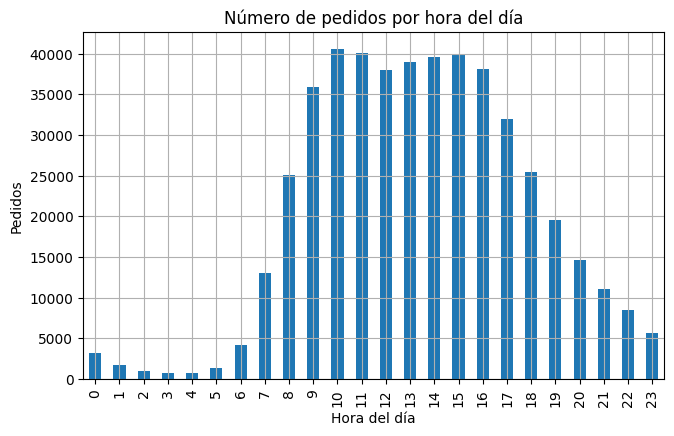

In [37]:
import pandas as pd
from matplotlib import pyplot as plt
order_hour_counts = df_orders['order_hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(7.5, 4.5))
order_hour_counts.plot(kind='bar')
plt.title('Número de pedidos por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Pedidos')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Escribe aquí tus conclusiones
Las horas con mayor movimiento son entre las 10am y las 4pm por lo que cualquier estrategia de promoción o de aumento de demanda tienen que ir segmentadas a esa hora para lograr un mayor alcance.

### [A3] ¿Qué día de la semana compran víveres las personas?

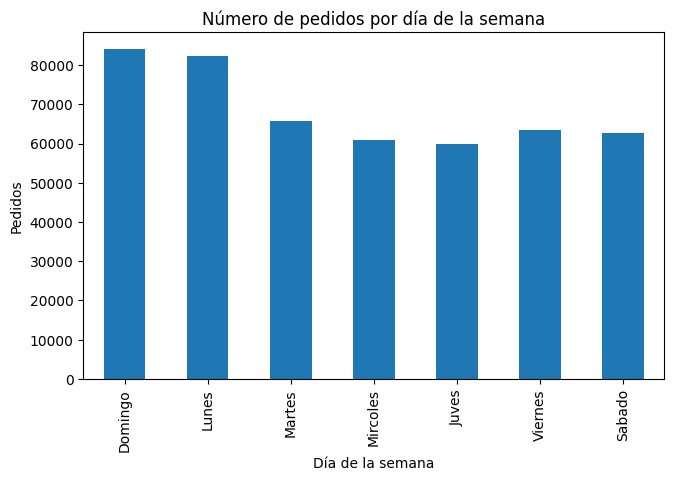

In [38]:
import pandas as pd
from matplotlib import pyplot as plt
order_hour_counts = df_orders['order_dow'].value_counts().sort_index()
plt.figure(figsize=(7.5, 4.5))
order_hour_counts.plot(kind='bar')
plt.title('Número de pedidos por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Pedidos')
plt.xticks(range(0, 7),["Domingo","Lunes","Martes","Mircoles","Juves","Viernes","Sabado"])
plt.show()

Escribe aquí tus conclusiones
Los días de la semana que se tiene mayor venta son los días Domingo y Lunes, posteriormente entre mediados de semana notamos una pequeña disminución de la venta y conforme se empieza a acercar el fin de semana el día Viernes empieza a aumentar los pedidos de nuevo.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

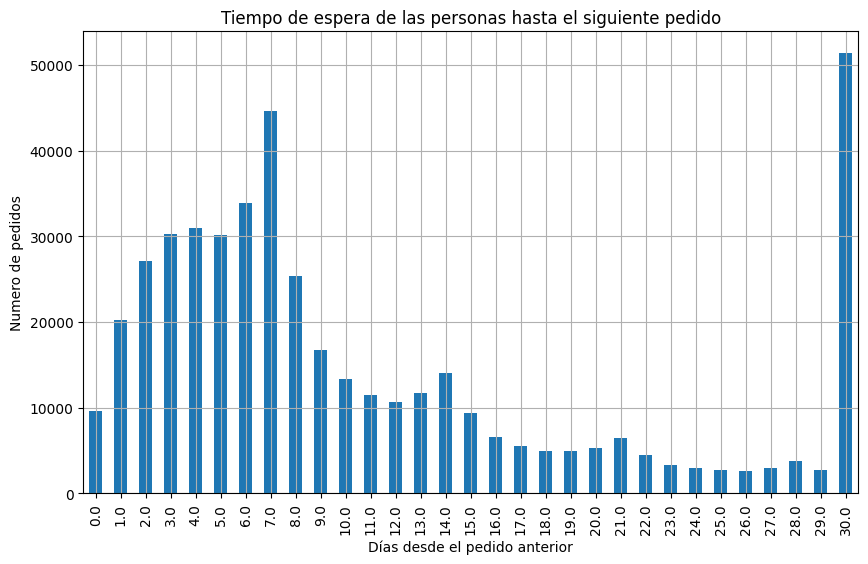

El tiempo de espera minimo de las personas para hacer otro pedido después de una comrpra es:0.0
El tiempo de espera maximo de las personas para hacer otro pedido después de una comrpra es:30.0


In [39]:
order_hour_counts = df_orders['days_since_prior_order'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
order_hour_counts.plot(kind='bar')
plt.title('Tiempo de espera de las personas hasta el siguiente pedido')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Numero de pedidos')
plt.grid(True)
plt.show()

min_days_since_prior_order = df_orders["days_since_prior_order"].min()
max_days_since_prior_order = df_orders["days_since_prior_order"].max()

print (f"El tiempo de espera minimo de las personas para hacer otro pedido después de una comrpra es:{min_days_since_prior_order}")
print (f"El tiempo de espera maximo de las personas para hacer otro pedido después de una comrpra es:{max_days_since_prior_order}")



Escribe aquí tus conclusiones
El tiempo de espera minimo para hacer otro pedido es de 0 días y el maximo de 30 días, pero los mayores picos se dan a los 7 días (una semana) y los 30 días (un mes) viendo el mayor pico a los 30 días, por lo que la mayor cantidad de personas tardan un mes en volver a hacer un pedido.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
wednesday_orders = df_orders[df_orders['order_dow'] == 3]['order_hour_of_day']
saturday_orders = df_orders[df_orders['order_dow'] == 6]['order_hour_of_day']

In [41]:
wednesday_counts = wednesday_orders.value_counts().sort_index()
saturday_counts = saturday_orders.value_counts().sort_index()

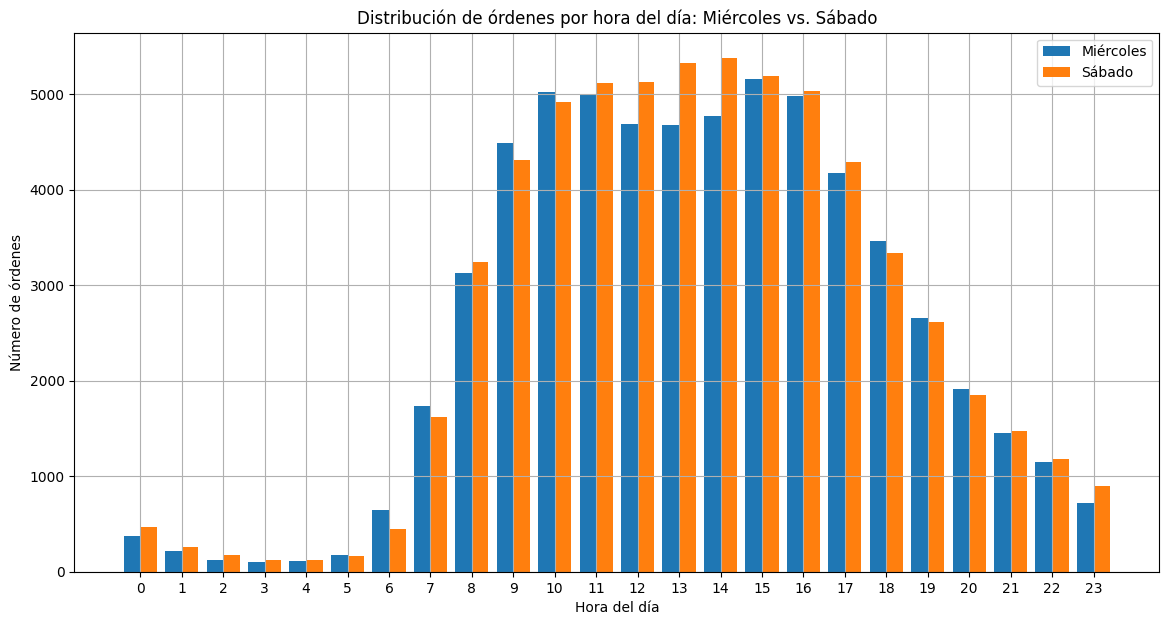

In [42]:
plt.figure(figsize=(14, 7))

plt.bar(wednesday_counts.index - 0.2, wednesday_counts.values, width=0.4, label='Miércoles', align='center')
plt.bar(saturday_counts.index + 0.2, saturday_counts.values, width=0.4, label='Sábado', align='center')
plt.title('Distribución de órdenes por hora del día: Miércoles vs. Sábado')
plt.xlabel('Hora del día')
plt.ylabel('Número de órdenes')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.show()

Escribe aquí tus conclusiones
El comportamiento es muy similar entre los dos días, aunque podemos observar una diferencia entre que el miércoles tienen una mayor actividad en las mañanas, pero  a partir de las 10 am su comportamiento varía entre altos y bajos y presenta su punto máximo a las 3;00pm, mientras que el sabado tiene una tendencia ascendete desde las 6:00am alcanzando su punto más alto a las 2:00 pm en donde empieza a descender mostrando una tendencia más regular.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [43]:
orders_per_customer = df_orders['user_id'].value_counts()

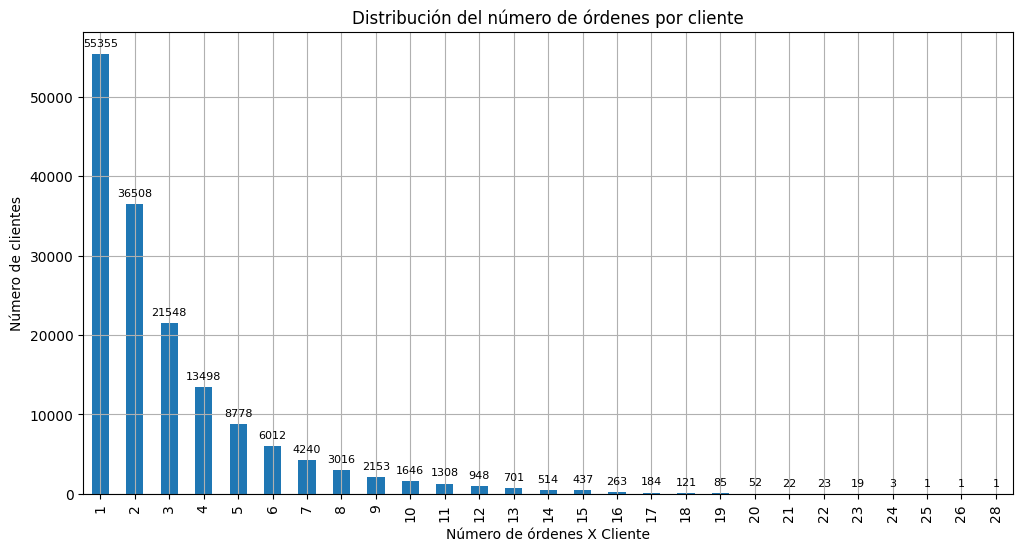

In [44]:
plt.figure(figsize=(12, 6))
bars = orders_per_customer.value_counts().sort_index().plot(kind='bar')
plt.title('Distribución del número de órdenes por cliente')
plt.xlabel('Número de órdenes X Cliente')
plt.ylabel('Número de clientes')
plt.grid(True)


for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 1000, 
        str(int(bar.get_height())), 
        ha='center', 
        fontsize=8, 
        color='black'
    )

plt.show()

Escribe aquí tus conclusiones
Podemos observar que la capacidad de retención de los clientes es baja, ya que observamos una tendencia muy marcada en la disminución de la repetición de compras por lo que sería importante crear un servicio posventa o un programa de fidelidad para incentivar a que el índice de repetición de compra sea mayor y no se pierdan tantos clientes entre compras.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [58]:
product_order_counts = df_order_products['product_id'].value_counts()

top_20_products = product_order_counts.head(20)
top_20_products_df = top_20_products.to_frame().reset_index()
top_20_products_df.columns = ['product_id', 'order_count']
top_products = top_20_products_df.merge(df_products, on='product_id')
top_products = top_products[['product_id', 'product_name', 'order_count']]

print("Los 20 principales productos que se piden con más frecuencia:")
print(top_products)


Los 20 principales productos que se piden con más frecuencia:
    product_id              product_name  order_count
0        24852                    Banana        66050
1        13176    Bag of Organic Bananas        53297
2        21137      Organic Strawberries        37039
3        21903      Organic Baby Spinach        33971
4        47209      Organic Hass Avocado        29773
5        47766           Organic Avocado        24689
6        47626               Large Lemon        21495
7        16797              Strawberries        20018
8        26209                     Limes        19690
9        27845        Organic Whole Milk        19600
10       27966       Organic Raspberries        19197
11       22935      Organic Yellow Onion        15898
12       24964            Organic Garlic        15292
13       45007          Organic Zucchini        14584
14       39275       Organic Blueberries        13879
15       49683            Cucumber Kirby        13675
16       28204      

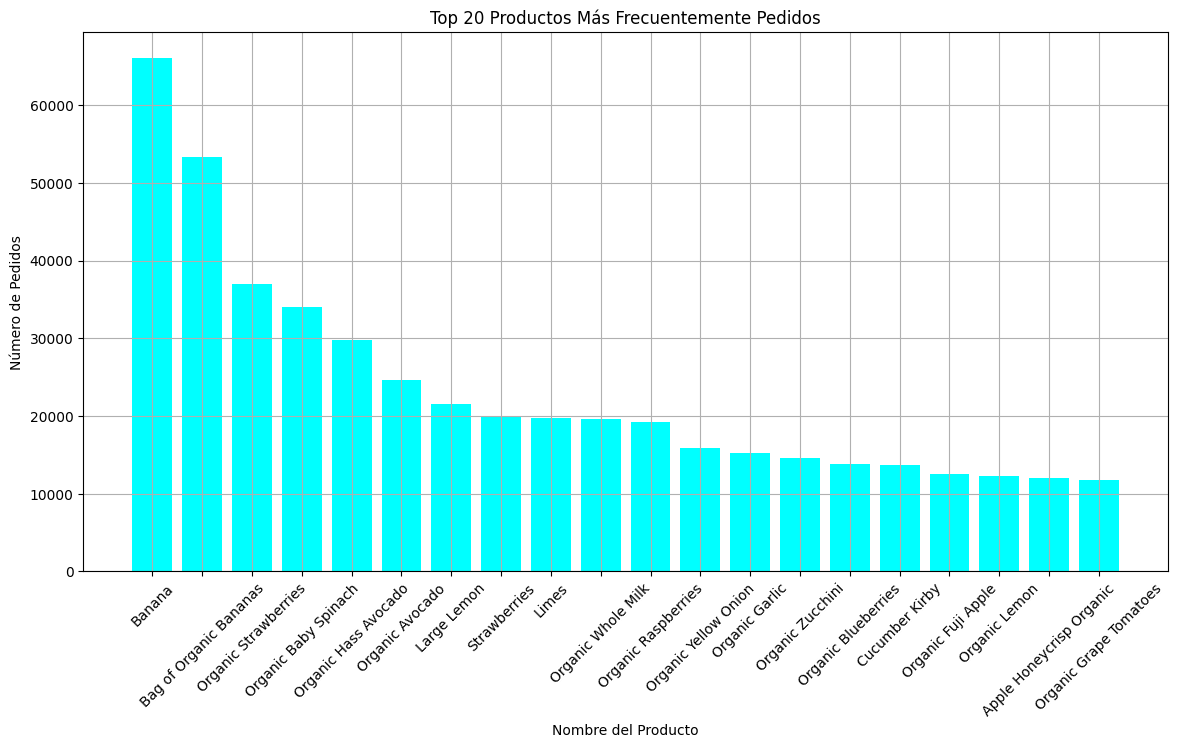

In [77]:
plt.figure(figsize=(14, 7))
plt.bar(top_products['product_name'], top_products['order_count'], color='cyan')
plt.xlabel('Nombre del Producto')
plt.ylabel('Número de Pedidos')
plt.title('Top 20 Productos Más Frecuentemente Pedidos')
plt.xticks(rotation=45)
plt.grid(True)
    
plt.show()

Escribe aquí tus conclusiones
Los dos productos que se consumen mas son los banano y adiocionalmente podemos destacar que los productos organicos tienen una muy alta demana debido a que 15 de los 20 productos son organicos,

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [79]:
items_per_order = df_order_products.groupby('order_id')['product_id'].count()

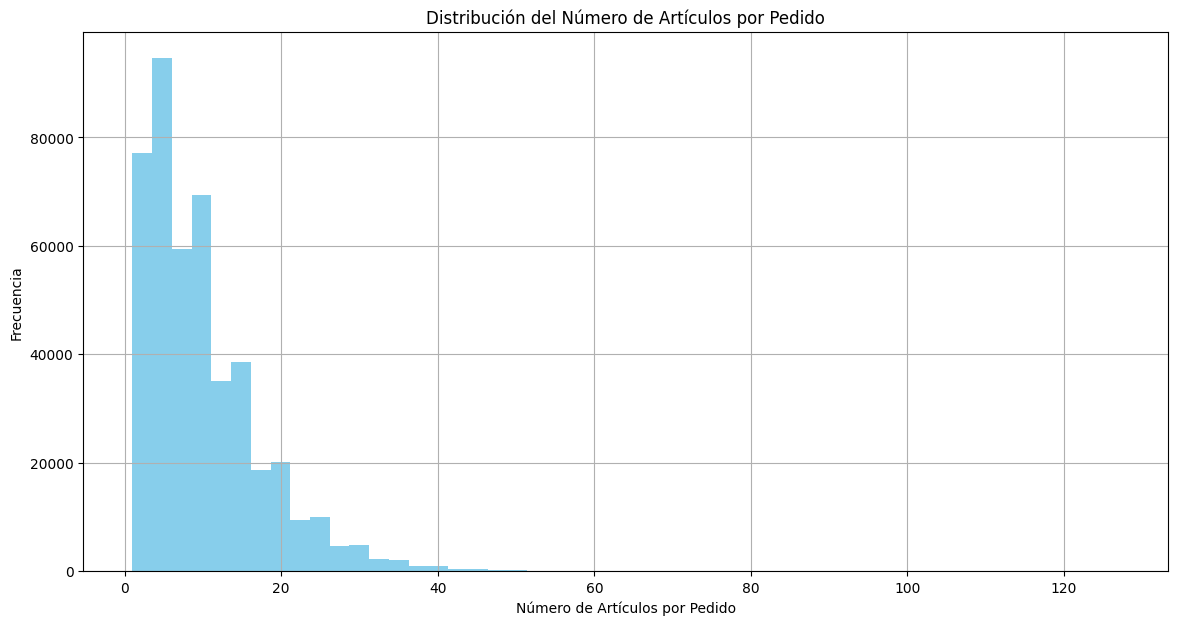

In [80]:
plt.figure(figsize=(14, 7))
plt.hist(items_per_order, bins=50, color='skyblue')
plt.xlabel('Número de Artículos por Pedido')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Artículos por Pedido')
plt.grid(True)
plt.show()


In [82]:
print(items_per_order)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64


Escribe aquí tus conclusiones

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [83]:
reordered_products = df_order_products[df_order_products['reordered'] == 1]
reordered_counts = reordered_products['product_id'].value_counts().head(20)

In [85]:
reordered_counts_df = reordered_counts.to_frame().reset_index()
reordered_counts_df.columns = ['product_id', 'reorder_count']

In [86]:
top_reordered_products = reordered_counts_df.merge(df_products, on='product_id')
top_reordered_products = top_reordered_products[['product_id', 'product_name', 'reorder_count']]

In [87]:
print("Los 20 principales artículos que vuelven a pedirse con mayor frecuencia:")
print(top_reordered_products)

Los 20 principales artículos que vuelven a pedirse con mayor frecuencia:
    product_id              product_name  reorder_count
0        24852                    Banana          55763
1        13176    Bag of Organic Bananas          44450
2        21137      Organic Strawberries          28639
3        21903      Organic Baby Spinach          26233
4        47209      Organic Hass Avocado          23629
5        47766           Organic Avocado          18743
6        27845        Organic Whole Milk          16251
7        47626               Large Lemon          15044
8        27966       Organic Raspberries          14748
9        16797              Strawberries          13945
10       26209                     Limes          13327
11       22935      Organic Yellow Onion          11145
12       24964            Organic Garlic          10411
13       45007          Organic Zucchini          10076
14       49683            Cucumber Kirby           9538
15       28204        Organic F

Escribe aquí tus conclusiones

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [91]:
total_product_orders = df_order_products['product_id'].value_counts()
reordered_products = df_order_products[df_order_products['reordered'] == 1]
reordered_counts = reordered_products['product_id'].value_counts()

In [92]:
reorder_rate = (reordered_counts / total_product_orders).reset_index()
reorder_rate.columns = ['product_id', 'reorder_rate']
reorder_rate_df = reorder_rate.merge(df_products, on='product_id', how='left')
reorder_rate_df = reorder_rate_df[['product_id', 'product_name', 'reorder_rate']]
reorder_rate_df['reorder_rate'].fillna(0, inplace=True)

In [93]:
print("Tasa de repetición del pedido para cada producto:")
print(reorder_rate_df)

Tasa de repetición del pedido para cada producto:
       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               7                     Pure Coconut Water With Orange   
...           ...                                                ...   
45568       49690                      HIGH PERFORMANCE ENERGY DRINK   
45569       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
45570       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
45571       49693                             SPRING WATER BODY WASH   
45572       49694                            BURRITO- STEAK & CHEESE   

       reorder_rate  
0          0.564286  
1          0.000000  
2          0.738095

Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [103]:
df_order_products_users = df_order_products.merge(df_orders[['order_id', 'user_id']], on='order_id')
total_user_orders = df_order_products_users.groupby('user_id')['reordered'].count()
user_reorders = df_order_products_users[df_order_products_users['reordered'] == 1].groupby('user_id')['reordered'].count()
user_reorder_rate = (user_reorders / total_user_orders).reset_index()
user_reorder_rate.columns = ['user_id', 'reorder_rate']
user_reorder_rate = user_reorder_rate.dropna()
print("Tasa de repetición de pedido para cada usuario:")
print(user_reorder_rate)

Tasa de repetición de pedido para cada usuario:
        user_id  reorder_rate
0             2      0.038462
2             5      0.666667
4             7      0.928571
5            11      0.200000
6            12      0.250000
...         ...           ...
149621   206203      0.222222
149622   206206      0.714286
149623   206207      0.891304
149624   206208      0.696000
149625   206209      0.320000

[132991 rows x 2 columns]


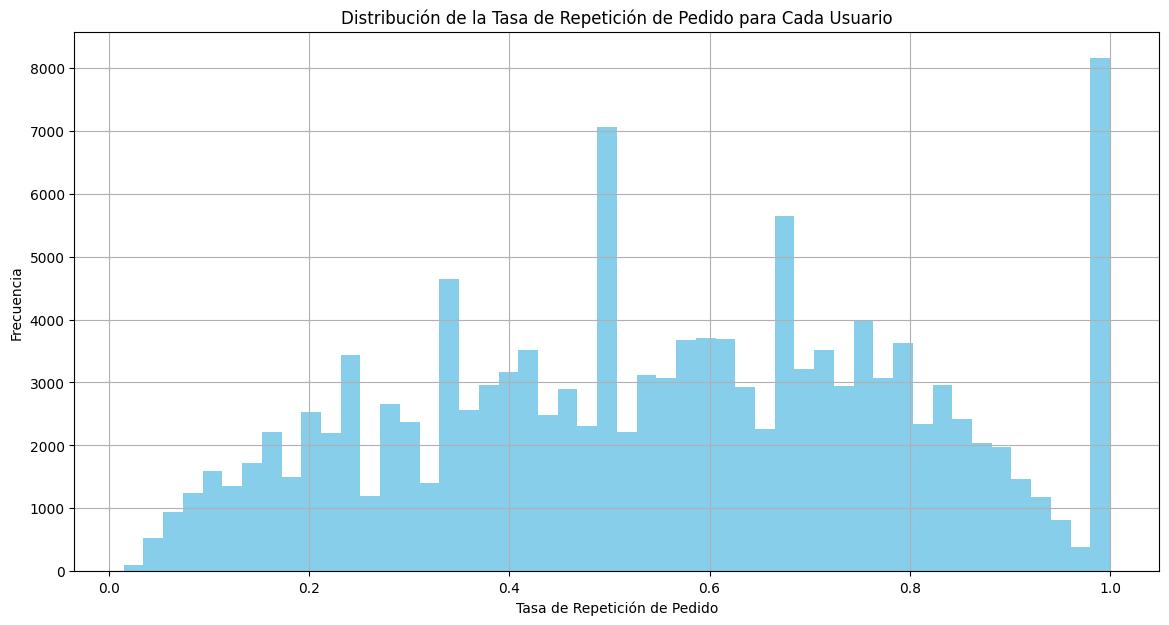

In [104]:
plt.figure(figsize=(14, 7))
plt.hist(user_reorder_rate['reorder_rate'], bins=50, color='skyblue')
plt.xlabel('Tasa de Repetición de Pedido')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Tasa de Repetición de Pedido para Cada Usuario')
plt.grid(True)
plt.show()

Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [96]:
first_in_cart = df_order_products[df_order_products['add_to_cart_order'] == 1]
first_in_cart_counts = first_in_cart['product_id'].value_counts().head(20)
first_in_cart_counts_df = first_in_cart_counts.to_frame().reset_index()
first_in_cart_counts_df.columns = ['product_id', 'first_count']

In [97]:
top_first_in_cart_products = first_in_cart_counts_df.merge(df_products, on='product_id')
top_first_in_cart_products = top_first_in_cart_products[['product_id', 'product_name', 'first_count']]

In [98]:
print("Los 20 principales artículos que la gente pone primero en sus carritos:")
print(top_first_in_cart_products)

Los 20 principales artículos que la gente pone primero en sus carritos:
    product_id                 product_name  first_count
0        24852                       Banana        15562
1        13176       Bag of Organic Bananas        11026
2        27845           Organic Whole Milk         4363
3        21137         Organic Strawberries         3946
4        47209         Organic Hass Avocado         3390
5        21903         Organic Baby Spinach         3336
6        47766              Organic Avocado         3044
7        19660                 Spring Water         2336
8        16797                 Strawberries         2308
9        27966          Organic Raspberries         2024
10       44632   Sparkling Water Grapefruit         1914
11       49235          Organic Half & Half         1797
12       47626                  Large Lemon         1737
13         196                         Soda         1733
14       38689     Organic Reduced Fat Milk         1397
15       26209  

Escribe aquí tus conclusiones

### Conclusion general del proyecto:

Segun los resultados obtenidos se puede concluir lo siguiente:
Las horas con mayor movimiento son entre las 10am y las 4pm por lo que cualquier estrategia de promoción o de aumento de demanda tienen que ir segmentadas a esa hora para lograr un mayor alcance y generar una estrategia de promociones en cenas para aumentar el orden de pedidos entre semana, dichas promocones y actividades se tienen que realizar los días Domingo y Lunes, que son los que tienen un mayr numero de pedidos, por lo que se tiene que asegurar que haya la sufiente cantidad de personas para atender estas ordenes los fines de semana por lo que se le puede pagar mas a los vendedores esos dias en especifico, tambien es importante continuar ofreciendo un catalogo amplio de productos organicos ya que son los productos que se encuentran con mayor consumo por lo que se tiene que ampliar el catalogo para ofrecer mas soluciones de este tipo, asi como creear un programa de fidelidad para incrementar el consumo de los clientes ya que 30 dias entre compra es mucho tiempo por lo que se pueden crear promociones semanales y un programa de acomulacion de puntos.